In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
df = pd.read_csv('../csv/FuelConsumption.csv')

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY',  'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


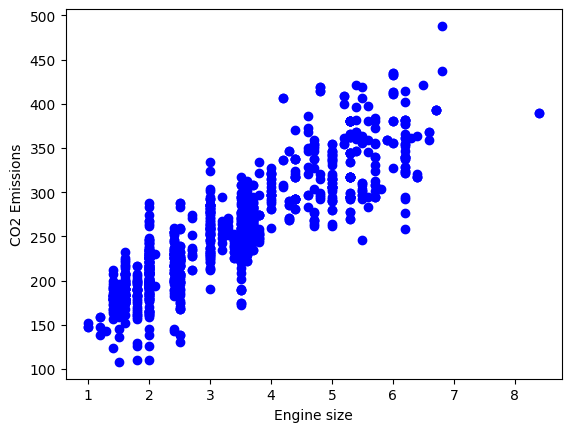

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.show()

In [9]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
Y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(X,Y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[11.12813019  7.48169558  9.5587632 ]]


In [16]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of squares: ', np.mean((y_hat-y)**2))

print("Variance: ", regr.score(x,y))



Residual sum of squares:  567.1700697995294
Variance:  0.84783127025859


C:\Users\Damwid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
